# Read Data

In [1]:
import pandas as pd

In [2]:
A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/Cars93.csv")

In [4]:
A.head(3)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


# Missing Data Treatment

In [6]:
from Wd8pm import replacer
replacer(A)

# Data Processing

In [15]:
Y=A[["Weight"]]
X=A.drop(labels=["Make","Weight","id","Model"],axis=1)

In [16]:
from Wd8pm import catcon
cat,con= catcon(X)

In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X1=pd.DataFrame(ss.fit_transform(X[con]),columns=con)



In [18]:
Xnew =pd.get_dummies(X[cat]).join(X1)
from sklearn.model_selection import train_test_split
xtrain,ytrain,ytrain,ytest =train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Tree

In [19]:
from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor(n_neighbors=5)

model =knr.fit(xtrain,ytrain)
tr_pred= model.predict(xtrain)
ts_pred =model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err= mean_absolute_error(ytrain,tr_pred)
ts_err= mean_absolute_error(ytest,ts_pred)
tr_err,ts_err


(115.82432432432432, 112.78947368421052)

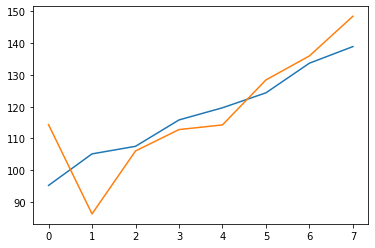

In [11]:
tr = []
ts = []
for i in range(2,10,1):
    knr = KNeighborsRegressor(n_neighbors=i)
    model = knr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err  = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

# GridSearchCV

In [28]:
tg = {"n_neighbors":range(2,10,1)}
knr = KNeighborsRegressor()

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(knr,tg,scoring = "neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_neighbors': 3}